<a href="https://colab.research.google.com/github/jkranyak/705_MBA_FinalPaper/blob/main/705_MBA_FinalPaper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# File path of the CSV
csv_file_path = "/content/Final_research_paper_titles_list.csv"

# Read the CSV file
combined_df = pd.read_csv(csv_file_path)

# Standardize column names and data
# Assume the columns we care about are 'Author' and 'Article'
if 'Author' not in combined_df.columns and 'Article' not in combined_df.columns:
    # Handle cases where author and article are in different columns or require renaming
    for col in combined_df.columns:
        if 'Author' in col:
            combined_df.rename(columns={col: 'Author'}, inplace=True)
        elif 'Article' in col:
            combined_df.rename(columns={col: 'Article'}, inplace=True)

# Display the combined DataFrame
combined_df.columns.tolist()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['Title', 'Source', 'Author', 'Abstract', 'Unnamed: 4', 'Year', 'Web_Address']

In [3]:
# import pandas as pd

# # Prioritized columns to merge
# columns_to_merge = ['Link', 'URL', 'url']

# # Function to merge columns into one
# def merge_columns(row, columns):
#     for column in columns:
#         if pd.notnull(row[column]):
#             return row[column]
#     return None

# # Create a new column 'Web_Address' using the merge_columns function
# combined_df['Web_Address'] = combined_df.apply(merge_columns, columns=columns_to_merge, axis=1)

# # Drop the original columns
# combined_df.drop(columns=columns_to_merge, inplace=True)

# combined_df.info()

In [4]:
# # Display the BibTeX column of combined_df
# combined_df['BibTeX']


In [5]:
# import re
# import pandas as pd
# import numpy as np

# # Regular expression to match key-value pairs in BibTeX entries
# bibtex_pattern = r'(\w+)\s*=\s*\{([^}]+)\}'

# def extract_bibtex_info(bibtex):
#     """Extract key-value pairs from a BibTeX entry and return them as a dictionary."""
#     return dict(re.findall(bibtex_pattern, bibtex))

# # List of columns to fill
# columns_to_fill = ['Title', 'Source', 'Author', 'Abstract', 'Year', 'title', 'authors', 'date', 'source', 'summary', 'Web_Address']

# # Fill in the missing values from the BibTeX
# for index, row in combined_df.iterrows():
#     bibtex = row.get('BibTeX', None)
#     if pd.notnull(bibtex):
#         bibtex_info = extract_bibtex_info(bibtex)
#         for col in columns_to_fill:
#             if col not in combined_df.columns:
#                 combined_df[col] = None
#             if pd.isnull(row[col]) and col.lower() in bibtex_info:
#                 combined_df.at[index, col] = bibtex_info[col.lower()]

# # Drop the BibTeX column after filling
# combined_df.drop(columns=['BibTeX'], inplace=True)

# # Display the final DataFrame
# combined_df


In [6]:
# import pandas as pd
# import numpy as np

# # Merging 'title' and 'Title'
# combined_df['Title'] = combined_df['Title'].fillna(combined_df['title'])
# combined_df.drop(columns=['title'], inplace=True)

# # Merging 'authors' and 'Author'
# combined_df['Author'] = combined_df['Author'].fillna(combined_df['authors'])
# combined_df.drop(columns=['authors'], inplace=True)

# # Merging 'Abstract' and 'summary'
# combined_df['Abstract'] = combined_df['Abstract'].fillna(combined_df['summary'])
# combined_df.drop(columns=['summary'], inplace=True)


# # Merging 'Year' and 'date'
# combined_df['Year'] = combined_df['Year'].fillna(combined_df['date'])
# combined_df.drop(columns=['date'], inplace=True)


# # Merging 'Year' and 'date'
# combined_df['Source'] = combined_df['Source'].fillna(combined_df['source'])
# combined_df.drop(columns=['source'], inplace=True)

# # Display the final DataFrame
# combined_df


In [7]:
# import pandas as pd

# # Calculate the score for each row based on the number of non-null entries
# combined_df['score'] = combined_df.count(axis=1)

# # Define which columns should be used to identify duplicates
# duplicate_columns = ['Title', 'Author']

# # Sort by duplicate columns and score
# combined_df = combined_df.sort_values(by=duplicate_columns + ['score'], ascending=[True, True, False])

# # Drop duplicates, keeping the row with the highest score
# combined_df = combined_df.drop_duplicates(subset=duplicate_columns, keep='first')

# # Drop the score column
# combined_df.drop(columns=['score'], inplace=True)

# # Display the resulting DataFrame
# combined_df



In [8]:
# combined_df.info()


In [9]:
# import pandas as pd

# # Keep only rows where at least one URL column has a non-null value
# url_columns = ['Web_Address']
# combined_df = combined_df.dropna(subset=url_columns, how='all')

# # Display the updated DataFrame
# combined_df


In [10]:
# combined_df.to_csv('combined_df.csv', index=False)

In [11]:
pip install openai==0.28

In [12]:
import os
import openai
import re

# Read API key from file
exec(open("/content/OPENAI_API.txt").read())

# Initialize OpenAI client
openai.api_key = OPENAI_API_KEY


# Create the directory to save articles
directory = "/content/papers"
os.makedirs(directory, exist_ok=True)

# Function to clean file names
def clean_filename(title):
    # Remove special characters and whitespace
    title = re.sub(r'[^\w\s-]', '', title).strip()
    # Replace whitespace with underscores
    return re.sub(r'\s+', '_', title)

# Deduplicate the DataFrame
combined_df.drop_duplicates(subset=['Title'], inplace=True)

# Function to fetch and save articles using gpt-4-turbo
def fetch_and_save_article(title, filename):
    try:
        response = openai.ChatCompletion.create(
            model="gpt-4-turbo",
            messages=[
                {"role": "user", "content": f"You are a Professional Researcher at a Global Think Tank. Generate an article for the following title: {title}.  if there is only an abstract, find the pdf link and open it. make sure you get the entire article"}
            ],
            max_tokens=2000,
            temperature=0.7
        )

        article_content = response.choices[0].message['content']

        with open(filename, 'w', encoding='utf-8') as file:
            file.write(article_content)

    except Exception as e:
        print(f"Error generating article for {title}: {e}")

# Generate and save articles
for index, row in combined_df.iterrows():
    title = row['Title'] or f"article_{index}"
    clean_title = clean_filename(title)
    filename = os.path.join(directory, f"{clean_title}.txt")
    if not os.path.exists(filename):  # Check if file already exists
        fetch_and_save_article(title, filename)


In [13]:
import os
import pandas as pd

# Directory where articles are saved
directory = "/content/papers"

# Prepare the data
data = []
for filename in os.listdir(directory):
    filepath = os.path.join(directory, filename)
    with open(filepath, 'r', encoding='utf-8') as file:
        text = file.read()
        data.append({"Title": filename, "Text": text})

# Create a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a .tab file
df.to_csv("/content/articles_for_orange.tab", sep='\t', index=False)


In [14]:
!pip install orange3

In [15]:
import shutil

# Specify the directory you want to compress
directory = "/content/research_papers"

# Compress the directory into a ZIP file
shutil.make_archive(directory, 'zip', directory)

# Provide a link to download the file
from google.colab import files
files.download(f"{directory}.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

nltk.download("stopwords")
nltk.download("punkt")

# Load data
data = pd.read_csv("/content/articles_for_orange.tab", delimiter="\t")

# Preprocess text
stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove special characters
    text = re.sub(r'\W', ' ', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into a single string
    return " ".join(tokens)

data["Text"] = data["Text"].apply(preprocess_text)

# Save processed data back to .tab file
data.to_csv("/content/processed_articles_for_orange.tab", sep="\t", index=False)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
import Orange

# Load the data from the preprocessed .tab file
data = Orange.data.Table("/content/processed_articles_for_orange.tab")


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
import nltk
from nltk.corpus import stopwords
import Orange

nltk.download('stopwords')

# Load the data
data = Orange.data.Table("/content/processed_articles_for_orange.tab")

# Convert Orange Table to Pandas DataFrame
df = pd.DataFrame(data.X, columns=data.domain.attributes)
df["Text"] = data[:, "Text"].metas.flatten()

# Prepare custom stopwords
custom_stopwords = list(set(stopwords.words("english")) | {
    "artificial intelligence", "ai", 'xai', 'also',
    "global organizations", "corporate strategies", "organizational policy",
    "impact", "effect", "consequence", "influence",
    "qualitative research", "meta-analysis", "thematic analysis"
})

# Prepare the text data
texts = df["Text"].tolist()
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words=custom_stopwords)
dtm = vectorizer.fit_transform(texts)

# Apply LDA
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(dtm)

# Display topics
for index, topic in enumerate(lda_model.components_):
    print(f"Topic #{index}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['analysis', 'artificial', 'corporate', 'global', 'intelligence', 'meta', 'organizational', 'organizations', 'policy', 'qualitative', 'research', 'strategies', 'thematic'] not in stop_words.
  warnings.warn(


Topic #0:
['data', 'decision', 'systems', 'agile', 'transparency', 'financial', 'making', 'explanations', 'models', 'model']
Topic #1:
['data', 'technologies', 'use', 'development', 'sustainability', 'social', 'personal', 'ethical', 'sustainable', 'identity']
Topic #2:
['challenges', 'efficiency', 'businesses', 'technologies', 'integration', 'making', 'decision', 'strategic', 'data', 'business']
Topic #3:
['development', 'job', 'organizational', 'future', 'employee', 'human', 'work', 'ethical', 'workforce', 'hr']
Topic #4:
['frameworks', 'international', 'data', 'technologies', 'systems', 'development', 'global', 'challenges', 'governance', 'ethical']


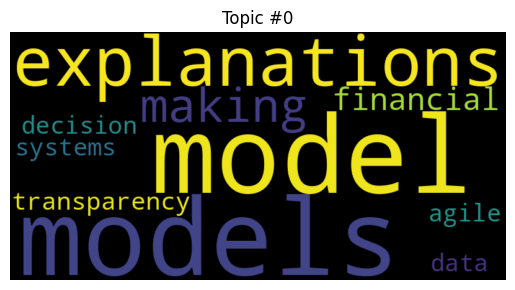

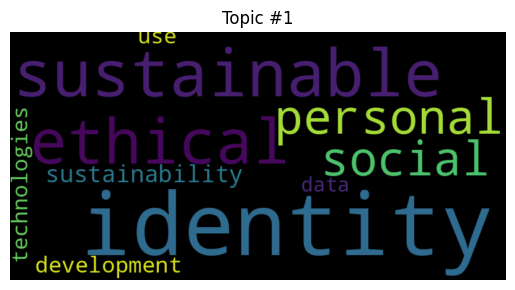

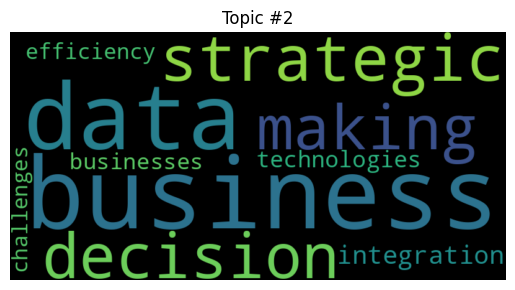

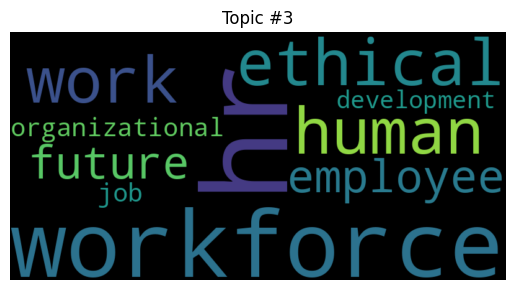

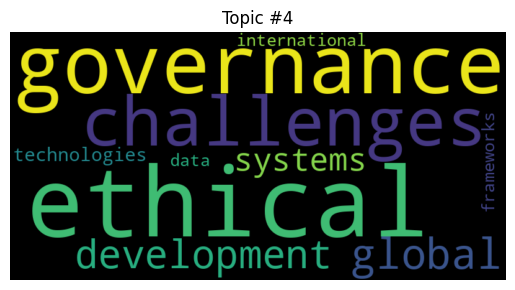

In [19]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate word clouds for each topic
for index, topic in enumerate(lda_model.components_):
    plt.figure()
    word_freqs = {vectorizer.get_feature_names_out()[i]: topic[i] for i in topic.argsort()[-10:]}
    wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(word_freqs)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Topic #{index}")
    plt.show()


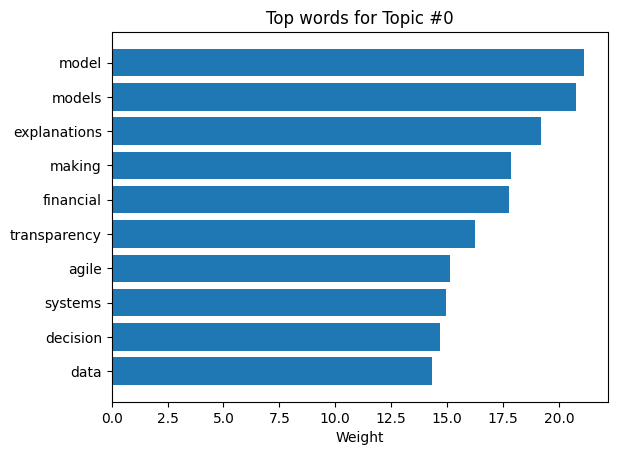

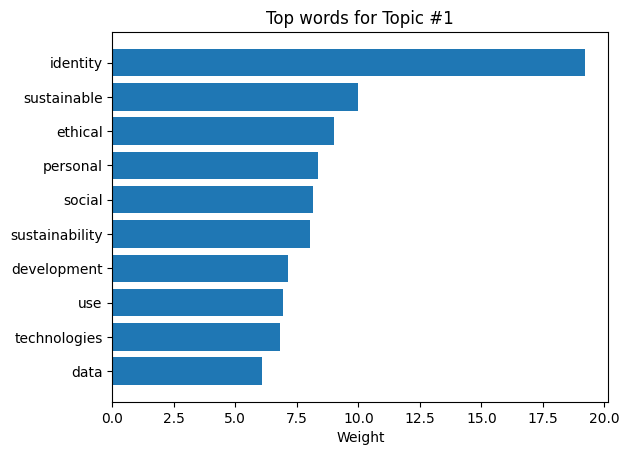

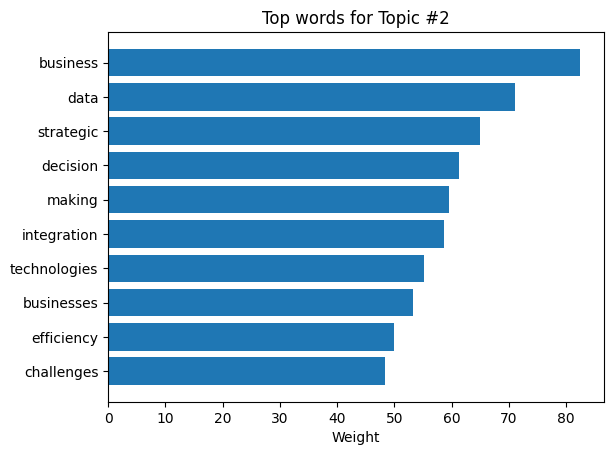

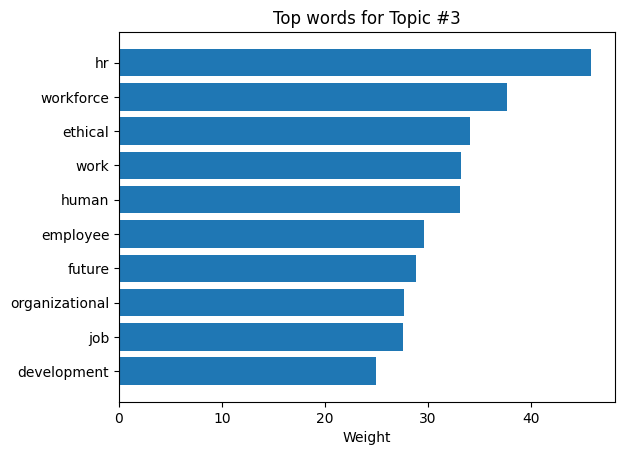

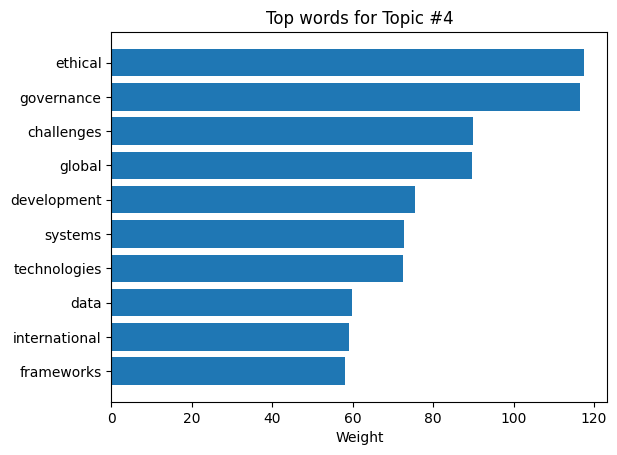

In [20]:
import numpy as np

# Generate bar charts for each topic
for index, topic in enumerate(lda_model.components_):
    plt.figure()
    top_indices = topic.argsort()[-10:]
    top_features = [vectorizer.get_feature_names_out()[i] for i in top_indices]
    top_weights = [topic[i] for i in top_indices]
    y_pos = np.arange(len(top_features))

    plt.barh(y_pos, top_weights, align='center')
    plt.yticks(y_pos, top_features)
    plt.xlabel("Weight")
    plt.title(f"Top words for Topic #{index}")
    plt.show()


In [24]:
# # @title Default title text
# import openai
# import os

# openai.api_key = OPENAI_API_KEY

# # Function to code a document with custom stopwords
# def code_document_with_stopwords(content):
#     stopwords = [
#         "artificial intelligence", "AI", "global organizations", "corporate strategies",
#         "organizational policy", "impact", "effect", "consequence", "influence",
#         "qualitative research", "meta-analysis", "thematic analysis"
#     ]
#     stopword_prompt = f"Ignore these terms: {', '.join(stopwords)}.\n\n"
#     prompt = f"Read the following document and identify key themes:\n\n{stopword_prompt}{content}"

#     response = openai.ChatCompletion.create(
#         model="gpt-4-turbo",
#         messages=[
#             {"role": "system", "content": "You are an expert thematic coder."},
#             {"role": "user", "content": prompt}
#         ]
#     )
#     return response.choices[0].message['content']

# # Directory where files are saved
# directory = "/content/papers"

# # Iterate through the files and code them
# results = {}
# for filename in os.listdir(directory):
#     filepath = os.path.join(directory, filename)
#     with open(filepath, 'r', encoding='utf-8') as file:
#         content = file.read()
#         themes = code_document_with_stopwords(content)
#         results[filename] = themes

# # Display the results
# for filename, themes in results.items():
#     print(f"File: {filename}\nThemes:\n{themes}\n")

import openai
import os
import pandas as pd

# Read API key from file
exec(open("/content/OPENAI_API.txt").read())

# Initialize OpenAI client
openai.api_key = OPENAI_API_KEY

# Function to code a document with custom stopwords
def code_document_with_stopwords(content):
    stopwords = [
        "artificial intelligence", "AI", "global organizations", "corporate strategies",
        "organizational policy", "impact", "effect", "consequence", "influence",
        "qualitative research", "meta-analysis", "thematic analysis"
    ]
    stopword_prompt = f"Ignore these terms: {', '.join(stopwords)}.\n\n"
    prompt = f"Read the following document and identify key themes:\n\n{stopword_prompt}{content}"

    response = openai.ChatCompletion.create(
        model="gpt-4-turbo",
        messages=[
            {"role": "system", "content": "You are an expert thematic coder."},
            {"role": "user", "content": prompt}
        ]
    )
    return response.choices[0].message['content']

# Directory where files are saved
directory = "/content/papers"

# Define focus areas to categorize themes
focus_areas = {
    'Strategic Decision-Making': ['decision-making', 'strategic planning'],
    'Policy Development': ['policy', 'compliance', 'ethics', 'legal', 'transparency'],
    'Innovation and Adaptation': ['innovation', 'adaptation', 'technology'],
    'Risk Management': ['risk management', 'cybersecurity'],
    'Workforce Dynamics & Human Resources': ['workforce', 'human resources', 'skills'],
    'Global Competitiveness': ['global competitiveness', 'market trends']
}

# DataFrame to hold all results
results_df = pd.DataFrame()

# Iterate through the files and code them
for filename in os.listdir(directory):
    filepath = os.path.join(directory, filename)
    with open(filepath, 'r', encoding='utf-8') as file:
        content = file.read()
        themes = code_document_with_stopwords(content)

        # Categorize themes based on focus areas
        temp_df = pd.DataFrame()
        for area, keywords in focus_areas.items():
            if any(keyword in themes for keyword in keywords):
                temp_df = pd.DataFrame([{'File': filename, 'Focus Area': area, 'Themes': themes}])
                results_df = pd.concat([results_df, temp_df], ignore_index=True)

# Sort by Focus Area
results_df.sort_values(by='Focus Area', inplace=True)

# Display or save the results
print(results_df.head())
# Optionally save to CSV
results_df.to_csv("/content/sorted_themes.csv", index=False)


                                                  File  \
133  The_Impact_of_Artificial_Intelligence_on_Firm_...   
38   Augmenting_organizational_Change_and_Strategy_...   
22   The_Role_of_Artificial_Intelligence_in_Shaping...   
119  The_Strategic_Role_of_AI_in_Governance_Risk_an...   
40   This_Is_How_AI_Can_Transform_The_Center_Of_Gov...   

                    Focus Area  \
133     Global Competitiveness   
38      Global Competitiveness   
22      Global Competitiveness   
119  Innovation and Adaptation   
40   Innovation and Adaptation   

                                                Themes  
133  Based on the provided document, the key themes...  
38   Key themes identified in the document are:\n\n...  
22   Based on the document provided, here are the k...  
119  Given the document and the instruction to igno...  
40   Upon analyzing the provided document, the key ...  


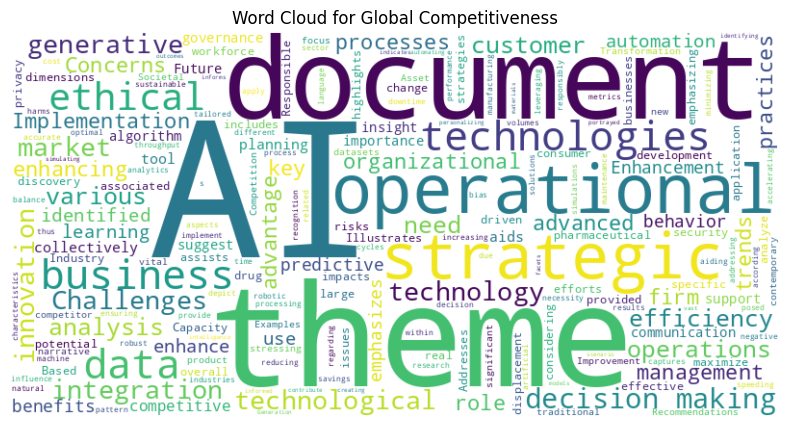

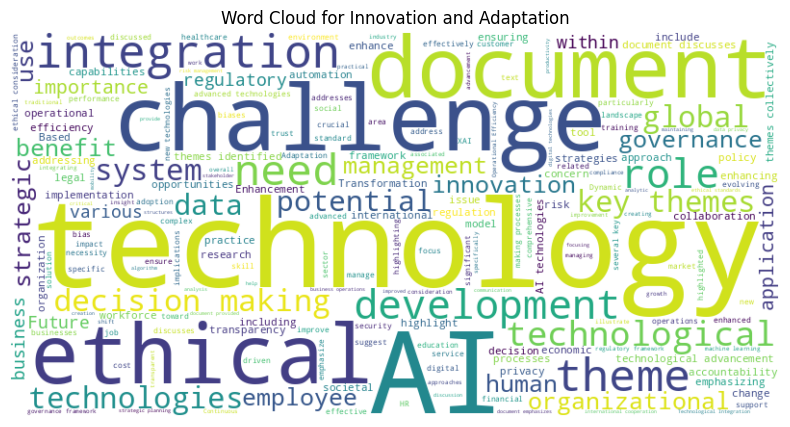

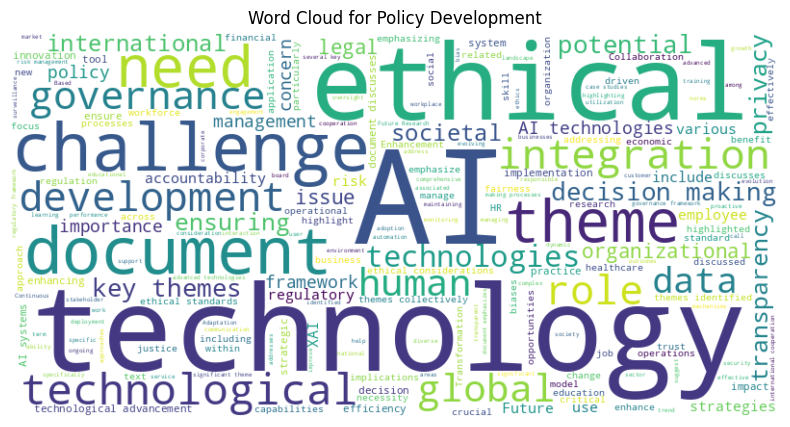

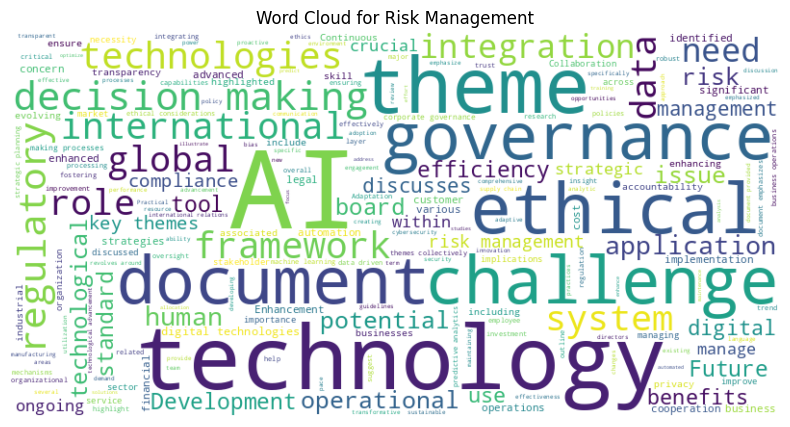

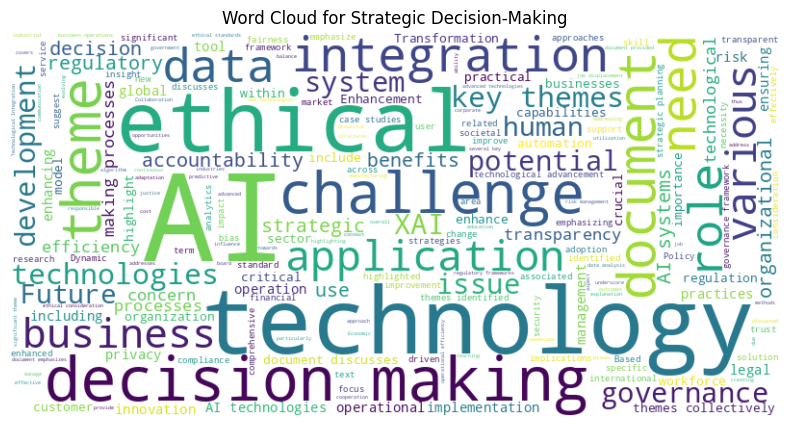

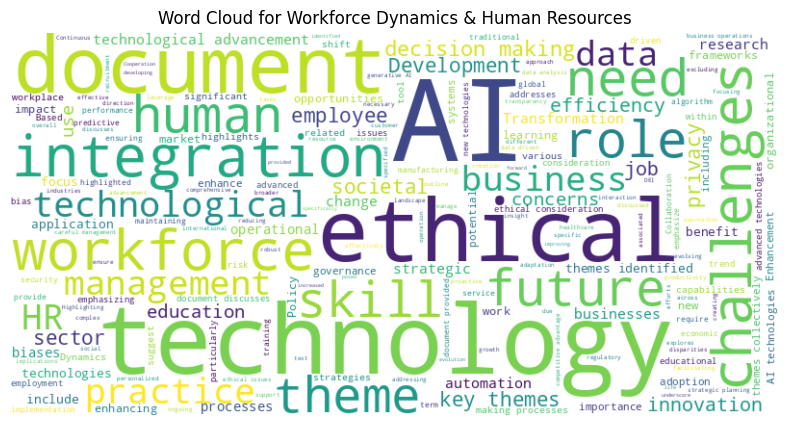

In [25]:
# import matplotlib.pyplot as plt
# from wordcloud import WordCloud

# # Generate a word cloud for the themes
# all_themes = " ".join(themes for themes in results.values())
# wordcloud = WordCloud(width=800, height=400).generate(all_themes)

# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Loop through each focus area and create a word cloud
for focus_area in results_df['Focus Area'].unique():
    # Filter the DataFrame for the current focus area
    filtered_themes = results_df[results_df['Focus Area'] == focus_area]['Themes']

    # Join all themes for the current focus area into a single string
    all_themes = " ".join(filtered_themes)

    # Generate a word cloud for the themes
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_themes)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {focus_area}')
    plt.axis("off")
    plt.show()


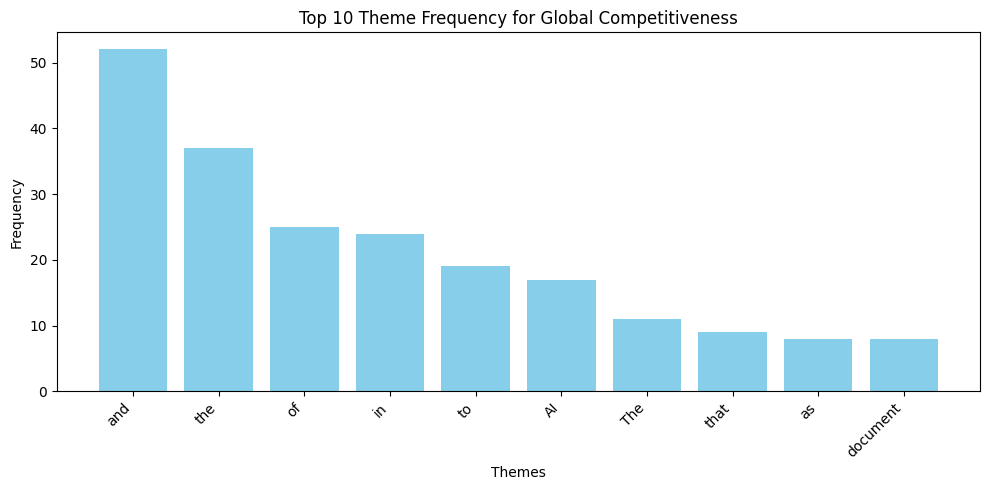

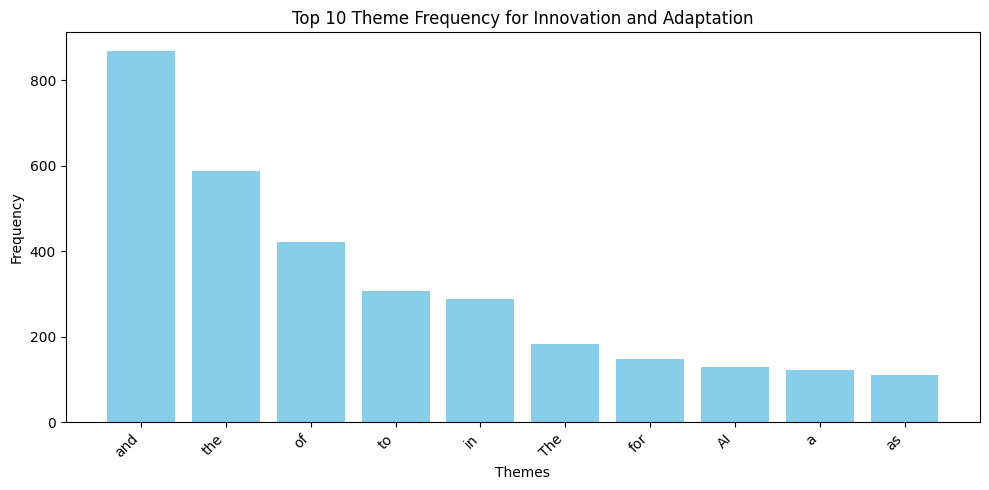

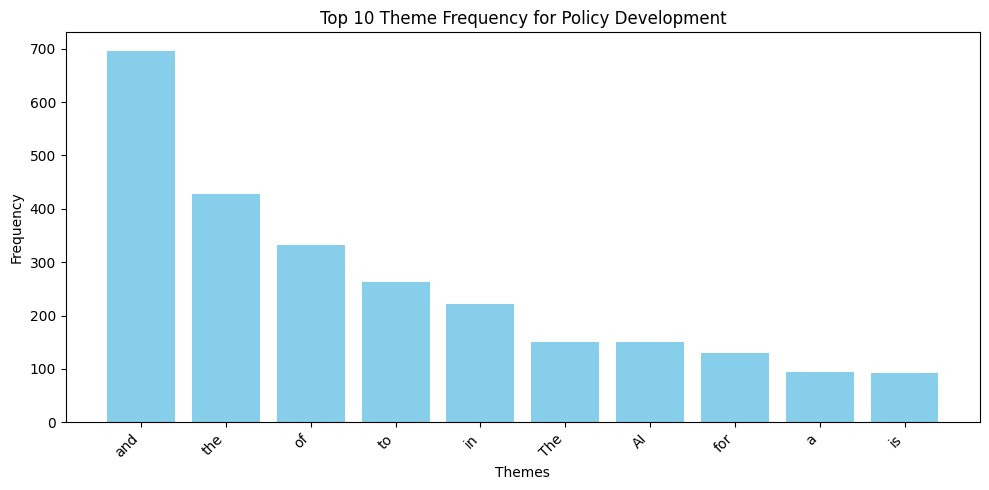

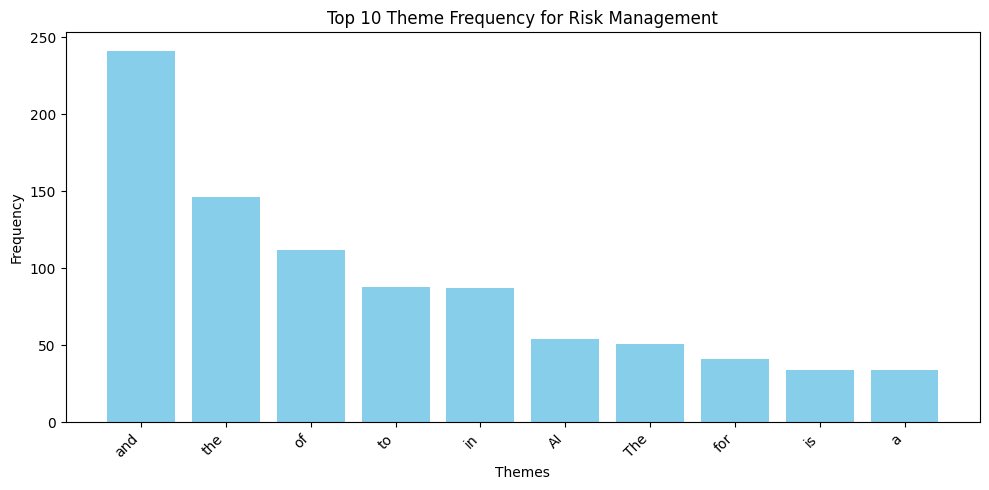

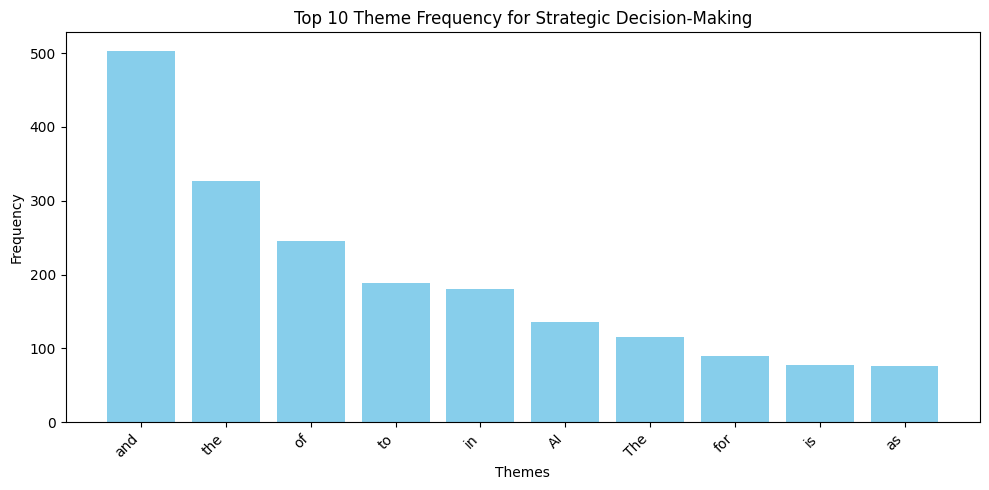

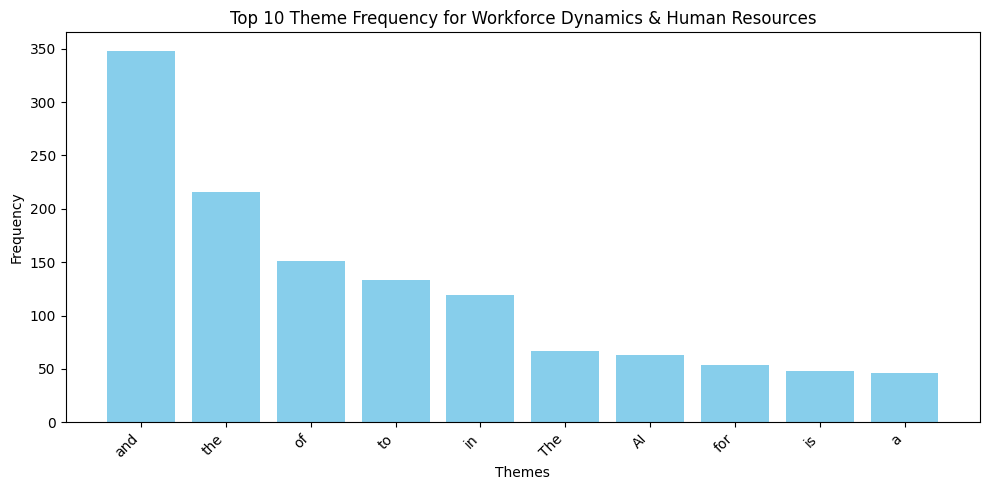

In [29]:
# from collections import Counter
# import matplotlib.pyplot as plt

# # Count the frequency of each theme
# theme_counts = Counter(theme for themes in results.values() for theme in themes.split())

# # Plot the bar chart
# plt.bar(theme_counts.keys(), theme_counts.values())
# plt.xlabel("Themes")
# plt.ylabel("Frequency")
# plt.title("Theme Frequency")
# plt.xticks(rotation=45, ha="right")
# plt.tight_layout()
# plt.show()
from collections import Counter
import matplotlib.pyplot as plt

# Define the number of top themes you want to display in each plot
top_n = 10  # You can adjust this number based on your preference

# Loop through each focus area to create separate frequency plots for top themes
for focus_area in results_df['Focus Area'].unique():
    # Filter the DataFrame for the current focus area
    filtered_themes = results_df[results_df['Focus Area'] == focus_area]['Themes']

    # Join all themes into a single string and count the frequency of each theme
    all_themes = " ".join(filtered_themes).split()
    theme_counts = Counter(all_themes)

    # Get only the top N themes for better clarity in the plot
    top_themes = {theme: count for theme, count in theme_counts.most_common(top_n)}

    # Plot the bar chart for the top themes of the current focus area
    plt.figure(figsize=(10, 5))
    plt.bar(top_themes.keys(), top_themes.values(), color='skyblue')
    plt.xlabel("Themes")
    plt.ylabel("Frequency")
    plt.title(f"Top {top_n} Theme Frequency for {focus_area}")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


In [ ]:
!pip install plotly --upgrade


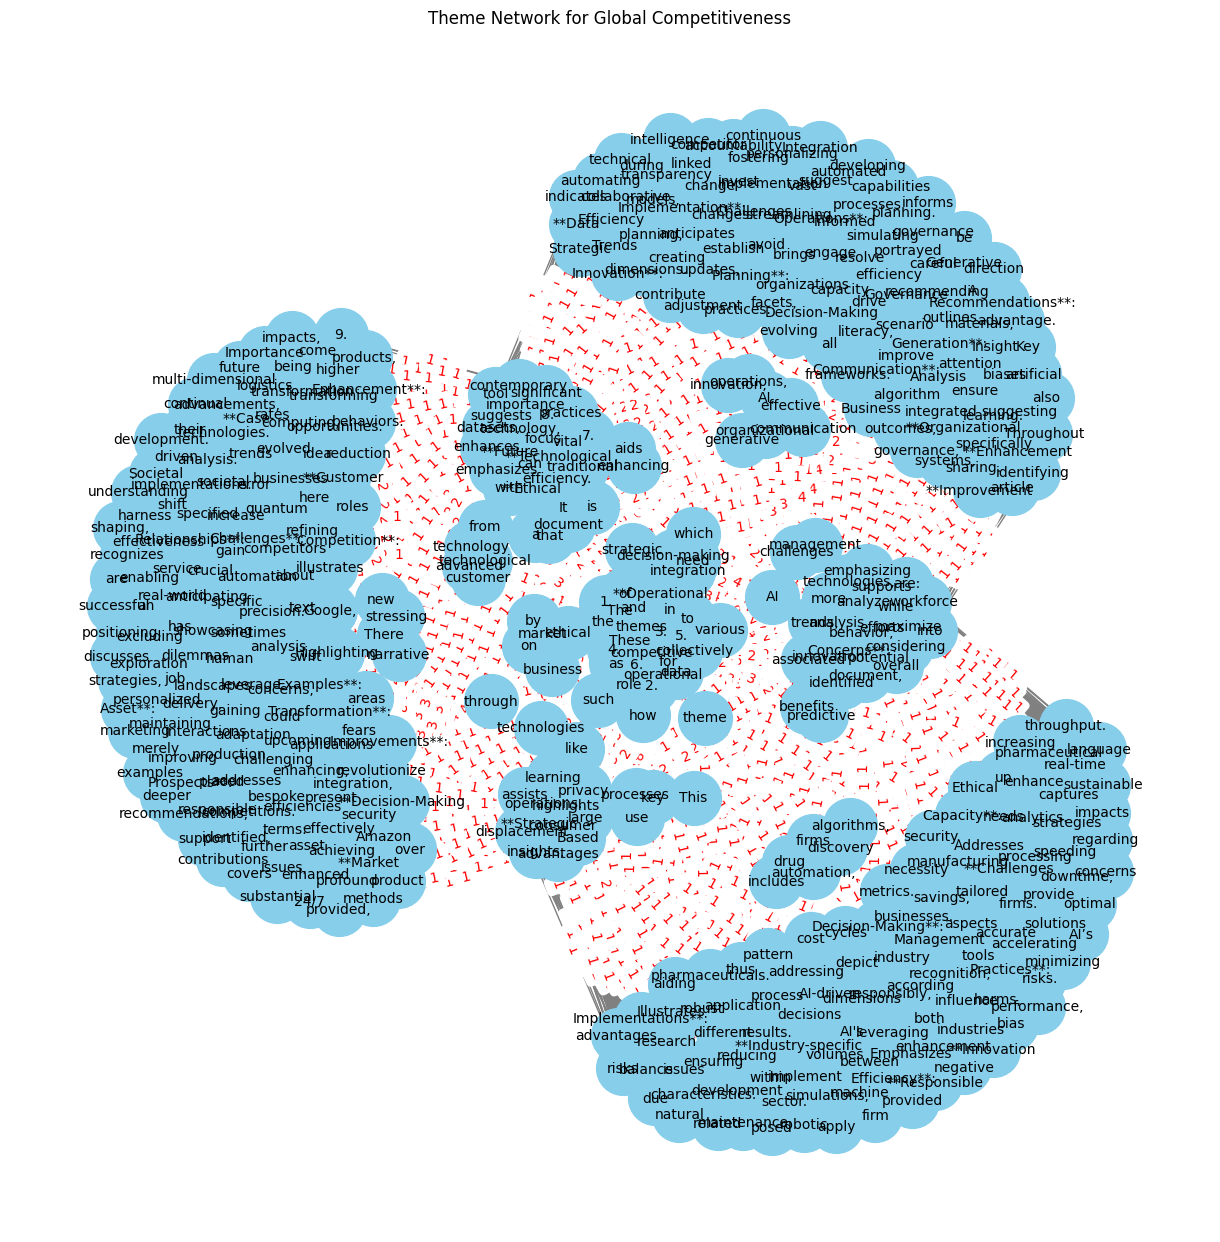

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7b9341551360> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7b93415505e0> (for post_execute):


KeyboardInterrupt: 

In [27]:
# import networkx as nx

# # Create a graph
# G = nx.Graph()

# # Build the network
# for themes in results.values():
#     theme_list = themes.split()
#     for i, theme1 in enumerate(theme_list):
#         for theme2 in theme_list[i + 1:]:
#             if G.has_edge(theme1, theme2):
#                 G[theme1][theme2]['weight'] += 1
#             else:
#                 G.add_edge(theme1, theme2, weight=1)

# # Draw the network
# plt.figure(figsize=(12, 12))
# pos = nx.spring_layout(G, k=0.5)
# nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=1500, font_size=10, font_color='black')
# nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f'{d["weight"]}' for u, v, d in G.edges(data=True)}, font_color='red')
# plt.title("Theme Network")
# plt.show()
import networkx as nx
import matplotlib.pyplot as plt

# Define a threshold for including an edge based on its weight (number of co-occurrences)
weight_threshold = 2  # Adjust this value based on your specific dataset to optimize visibility

# Loop through each focus area to create separate network graphs with filtered connections
for focus_area in results_df['Focus Area'].unique():
    # Filter the DataFrame for the current focus area
    filtered_themes = results_df[results_df['Focus Area'] == focus_area]['Themes']

    # Create a graph for the current focus area
    G = nx.Graph()

    # Build the network from the filtered themes, applying the weight threshold
    for themes in filtered_themes:
        theme_list = themes.split()
        for i, theme1 in enumerate(theme_list):
            for theme2 in theme_list[i + 1:]:
                if theme1 != theme2:
                    if G.has_edge(theme1, theme2):
                        G[theme1][theme2]['weight'] += 1
                    else:
                        G.add_edge(theme1, theme2, weight=1)

    # Filter out edges with weight below the threshold
    for (u, v, d) in list(G.edges(data=True)):
        if d['weight'] < weight_threshold:
            G.remove_edge(u, v)

    # Draw the filtered network graph for the current focus area
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G, k=0.5)  # Adjust the layout spacing for better visibility
    nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=1000)
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')
    plt.title(f"Filtered Theme Network for {focus_area}")
    plt.axis('off')  # Hide the axes to enhance focus on the graph
    plt.show()


In [28]:
from collections import Counter

# Aggregate all themes from the DataFrame
all_themes_list = " ".join(results_df['Themes']).split()
theme_frequencies = Counter(all_themes_list)

# Display the top 10 most common themes
top_themes = theme_frequencies.most_common(10)
print("Top 10 Themes by Frequency:")
for theme, count in top_themes:
    print(f"{theme}: {count}")


Top 10 Themes by Frequency:
and: 2709
the: 1740
of: 1288
to: 999
in: 922
The: 577
AI: 551
for: 471
a: 377
is: 356


In [ ]:
# Define a threshold for theme inclusion based on frequency or centrality
frequency_threshold = 5  # Adjust this based on your dataset
centrality_threshold = 0.01  # Adjust this based on your dataset

# Filter themes by frequency
filtered_themes = {theme for theme, count in theme_frequencies.items() if count >= frequency_threshold}

# Create a graph with filtered themes
G_filtered = nx.Graph()
for themes in results_df['Themes']:
    theme_list = [theme for theme in themes.split() if theme in filtered_themes]
    for i, theme1 in enumerate(theme_list):
        for theme2 in theme_list[i + 1:]:
            if theme1 != theme2:
                if G_filtered.has_edge(theme1, theme2):
                    G_filtered[theme1][theme2]['weight'] += 1
                else:
                    G_filtered.add_edge(theme1, theme2, weight=1)

# Draw the filtered network
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G_filtered, k=0.15)  # Adjust layout spacing
nx.draw(G_filtered, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=2000, font_size=9, font_color='black')
nx.draw_networkx_edge_labels(G_filtered, pos, edge_labels={(u, v): f'{d["weight"]}' for u, v, d in G_filtered.edges(data=True)}, font_color='red')
plt.title("Filtered Theme Network")
plt.show()


In [ ]:
import community as community_louvain

# Apply community detection
partition = community_louvain.best_partition(G_filtered)

# Draw the network with community coloring
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G_filtered, k=0.15)
cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G_filtered, pos, partition.keys(), node_size=2000, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G_filtered, pos, alpha=0.5)
nx.draw_networkx_labels(G_filtered, pos)
plt.title("Thematic Communities in Network")
plt.show()
